<a href="https://colab.research.google.com/github/sara87821/20210602/blob/main/clssification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
# DataFrame:表格.Series:一行/一列
df = pd.DataFrame(iris["data"],columns=iris["feature_names"])
df["ans"] = iris["target"]
df.to_csv("iris.csv", encoding="utf-8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
# sklearn前:pandas.DataFrame
# sklaern後:np.array
import numpy as np
from sklearn.model_selection import train_test_split
x,y = np.array(df.drop(["ans"], axis = 1)), np.array(df["ans"])
# 基本上是隨機切，但也可以用randomstate切
# 90%x, 10%x, 90%y, 10%y
x_train, x_test, y_train, y_test=train_test_split(
                  x,
                  y,
                  test_size=0.1
                  )
print(x_train.shape)#135筆，四個值構成
print(x_test.shape)#15筆，四個值構成
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


In [23]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
# 把資料給決策樹
clf.fit(x_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(223.2, 504.7714285714286, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [48, 45, 42]\nclass = setosa'),
 Text(167.39999999999998, 427.11428571428576, 'gini = 0.0\nsamples = 48\nvalue = [48, 0, 0]\nclass = setosa'),
 Text(279.0, 427.11428571428576, 'petal length (cm) <= 4.75\ngini = 0.499\nsamples = 87\nvalue = [0, 45, 42]\nclass = versicolor'),
 Text(223.2, 349.4571428571429, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]\nclass = versicolor'),
 Text(334.79999999999995, 349.4571428571429, 'petal width (cm) <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]\nclass = virginica'),
 Text(223.2, 271.8, 'petal length (cm) <= 5.35\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]\nclass = virginica'),
 Text(167.39999999999998, 194.14285714285717, 'petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]\nclass = versicolor'),
 Text(111.6, 116.48571428571432, 'petal length (cm) <= 4.95\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(

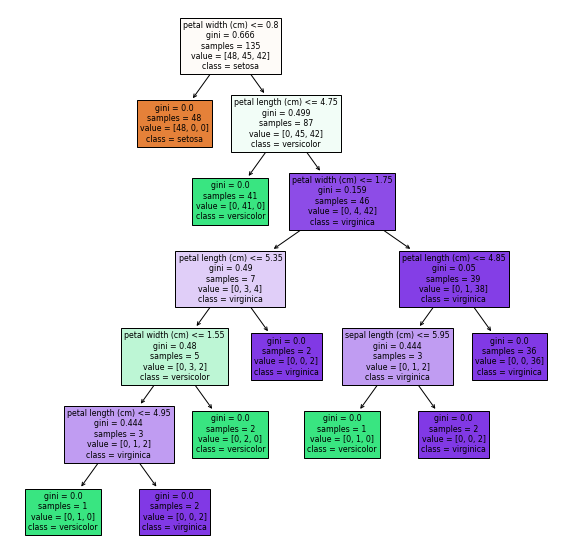

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(clf,
          feature_names=iris["feature_names"],
          class_names=iris["target_names"],
          filled=True)